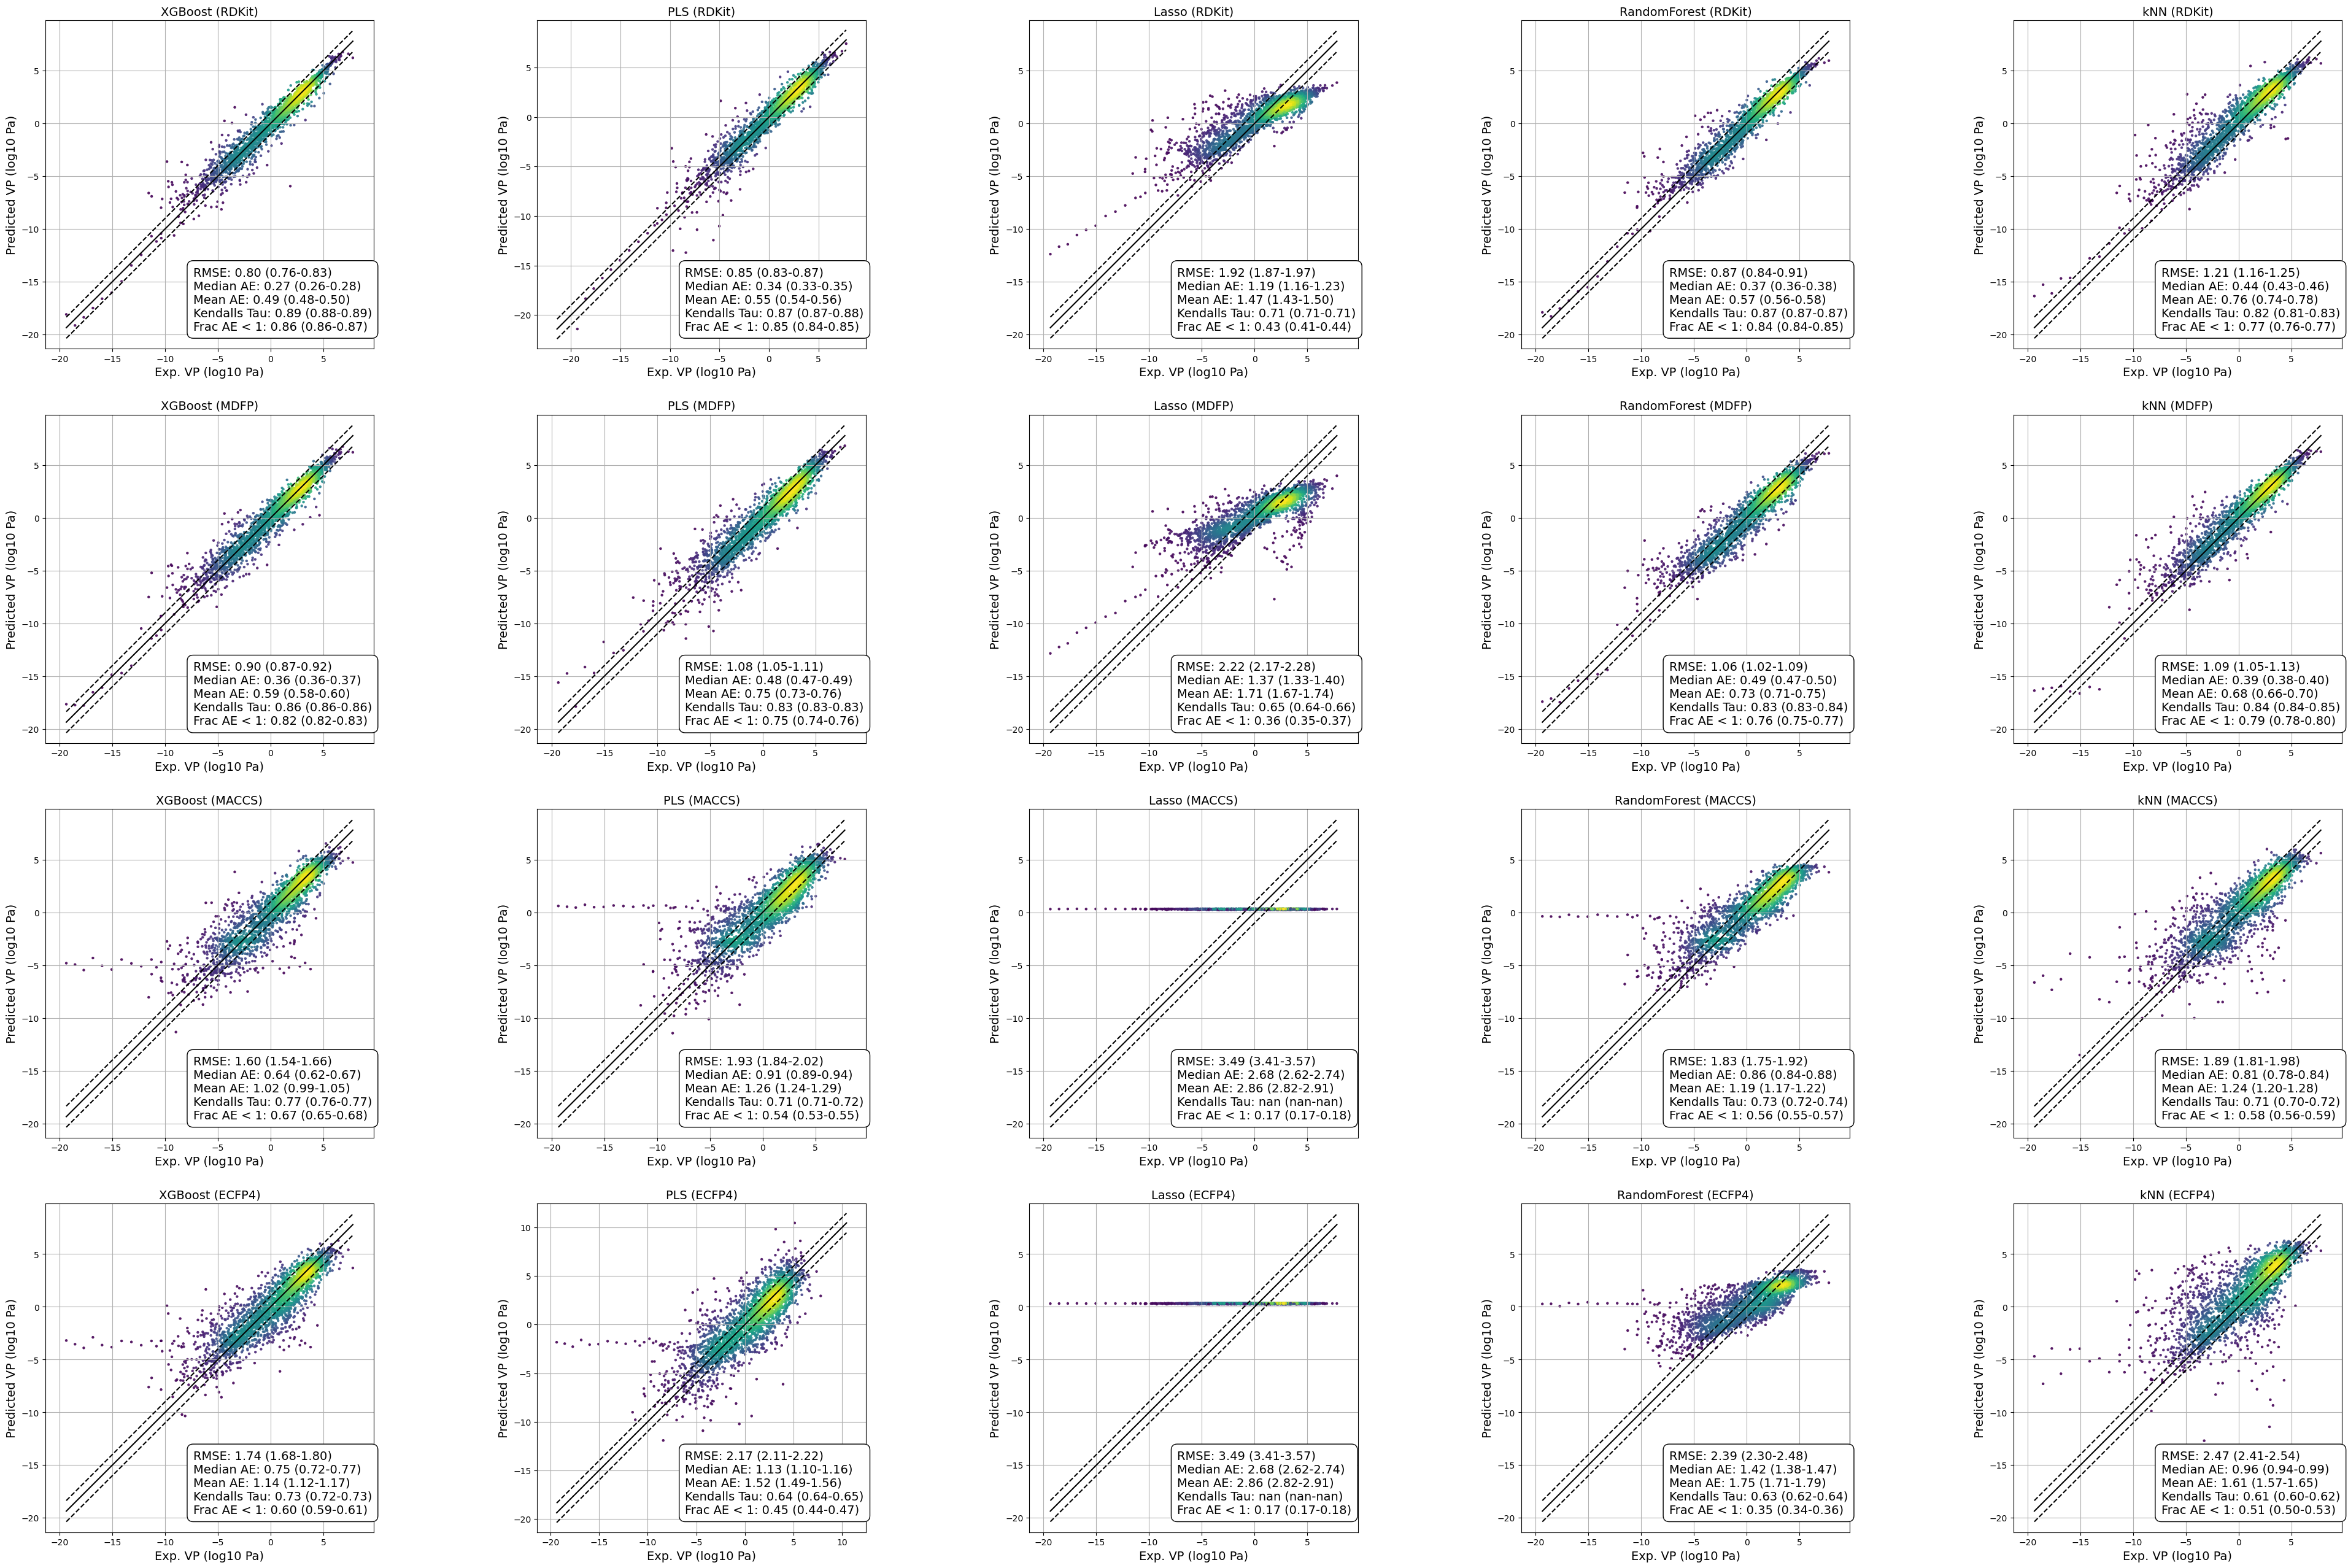

In [2]:
import pandas as pd
from utils.visualization import density_plots

data = pd.read_pickle('results/all_models_descriptors.pkl')
combined_reals = data['reals_list']
combined_preds = data['predictions_list']
combined_molregnos = data['molregnos_list']

combined_titles = []
descriptors_to_use = ['RDKit', 'MDFP', 'MACCS', 'ECFP4']
models_to_evaluate = ['XGBoost', 'PLS', 'Lasso', 'RandomForest', 'kNN']
for descriptor in descriptors_to_use:
    for model_name in models_to_evaluate:
        combined_titles.append(f"{model_name} ({descriptor})")

density_plots(reals_list=combined_reals, predictions_list=combined_preds, molregnos_list=combined_molregnos,
                print_stats=True, bounds=None, title=combined_titles,
                name="all_models_descriptors1", dims=(len(descriptors_to_use), len(models_to_evaluate)), thresholds=1)
